# MIDAS estimator in python (w numpy)
## Example on site P288 using Mintpy gps module

In [1]:
from mintpy.objects import gps
from midas import midas
from datetime import datetime
import numpy as np
import requests

from IPython.display import Image
from IPython.core.display import HTML 

In [53]:
#Select the GPS site
site_name = 'P287'

In [56]:
# Use Mintpy object to download gnss timeseries data 
gps_site = gps.GPS(site=site_name)
gps_site.open()

#Extract dates and displacement arrays
ts_disp  = np.array([gps_site.dis_e, gps_site.dis_n, gps_site.dis_u]).T
ts_dates = gps_site.dates

# Add steps 
# http://geodesy.unr.edu/NGLStationPages/steps.txt
master_steps_list = requests.get('http://geodesy.unr.edu/NGLStationPages/steps.txt').text
site_steps = [line for line in master_steps_list.split('\n')
              if site_name in line]

steps = [datetime.strptime(step.split(' ')[2], '%y%b%d')
        for step in site_steps]
print('\nSteps:'), [print(step) for step in steps] 

calculating station lat/lon
reading time and displacement in east/north/vertical direction

Steps:
2020-08-06 00:00:00
2020-08-06 00:00:00
2019-07-06 00:00:00


(None, [None, None, None])

East:  vel. -39.60 ± 0.15 mm/yr, intercept 63.78 mm/yr,
North: vel. 22.03 ± 0.14 mm/yr, intercept 963.03 mm/yr,
Up:    vel. 0.89 ± 0.40 mm/yr, intercept 707.41 mm/yr,


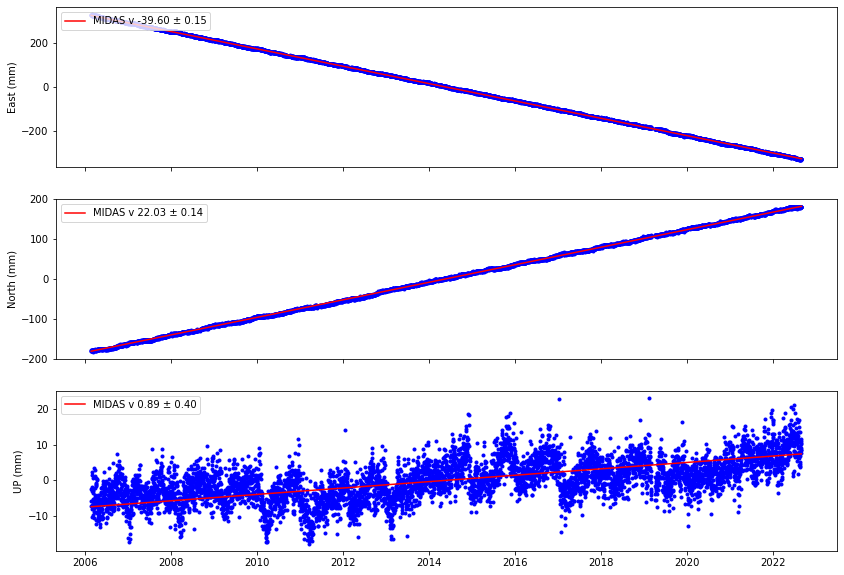

In [50]:
# MIDAS calculation

[midas_vel, midas_vstds, midas_intercept, midas_residuals] = midas(ts_dates, ts_disp, steps=steps, display=True)

result = [print(txt + f' vel. {v:.2f} \u00B1 {std:.2f} mm/yr, intercept {b:.2f} mm/yr,') 
          for i, (txt, v, std, b) in enumerate(zip(['East: ', 'North:', 'Up:   '], 
               midas_vel[0]*1000, midas_vstds[0]*1000, midas_intercept[0]*1000))]

In [51]:
Image(url= f"http://geodesy.unr.edu/tsplots/IGS14/IGS14/TimeSeries/{site_name}.png", width=900, height=1200)

In [5]:
# Example how to get decimal years - convention JPL 
# for GIPSY time series (first epoch - Jan. 01, 2000)

from datetime import datetime
decimal_years = [(2000 + (date - datetime(2000,1,1)).days / 365.25)
                 for _,date in enumerate(ts_dates)]

print(decimal_years[:10])

[2005.09787816564, 2005.100616016427, 2005.1033538672143, 2005.1060917180014, 2005.1088295687885, 2005.1115674195755, 2005.1143052703628, 2005.11704312115, 2005.119780971937, 2005.1225188227243]
